In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
import imageio
import glob
import itertools
import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import tensorflow as tf

In [2]:
os.getcwd()

'C:\\Users\\ariju\\Documents\\pamokos\\programavimas\\atsiskaitymas'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '2022-05-24 18_50_25-Greenshot.png',
 'accuracy_entropy.jpg',
 'accuracy_mean_s_e.jpg',
 'Arijus Skaisgirys',
 'atsiskaitymas.ipynb',
 'backup',
 'bandymas.xlsx',
 'CarBuyers.csv',
 'Car_sales.csv',
 'cheapest_cars.png',
 'check.csv',
 'chromium',
 'data',
 'expensive_cars.png',
 'gifas.gif',
 'kainu_pasiskirstymas.png',
 'loss_entropy.jpg',
 'loss_mean_s_e.jpg',
 'mfp',
 'mfp_naujas',
 'mobile_de',
 'most_popular_cars.png',
 'pasiskirstymasmfu.png',
 'patikrint.csv',
 'power_transmission.png',
 'price-predictor.dot',
 'price_power.png',
 'price_predicttion_tree_new.dot',
 'skelbimai',
 'usedCarsFinal.csv']

In [4]:
data = pd.read_csv('CarBuyers.csv')

In [5]:
data

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,5.966102,94.033898,1497.169492,petrol,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,6.164835,89.461538,1537.406593,petrol,483216,310604,"47,563",841383
3,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,petrol,241287,312556,"28,004",581847
4,BMW,320i,47.848370,6.444444,126.111111,1995.777778,petrol,408016,115843,"29,125",552984
...,...,...,...,...,...,...,...,...,...,...,...
6087,Land-Rover,Defender,108.747195,7.853659,207.609756,2304.975610,diesel,"1,012",150,80,"1,242"
6088,Toyota,RAV4,43.548516,1.354839,137.774193,2261.193548,petrol,670,482,66,"1,218"
6089,Alfa-Romeo,Spider,55.200000,6.000000,163.500000,2696.500000,petrol,790,247,81,"1,118"
6090,Honda,Shuttle,30.081000,4.000000,110.000000,2254.000000,petrol,639,416,49,"1,104"


In [6]:
data.dtypes

Manufacturer     object
Model            object
Price           float64
Transmission    float64
Power           float64
Engine CC       float64
Fuel             object
Male             object
Female           object
Unknown          object
Total            object
dtype: object

In [7]:
class String_to_float:
    def __init__(self, y):
        self.y = y
    
    def comma_to_dot(self, x): # pakeicia , i . ir padaro floatu
        x = x.replace(',', '.')
        return float(x)

    def column_to_float(self): # lenteles stulpelio nerius pakeicia i float , jei yra kablelis skaiciui
        for i in self.y:
            data[i] = data[i].map(self.comma_to_dot)


string_to_float = String_to_float(['Male', 'Female', 'Unknown', 'Total'])
string_to_float.column_to_float()

In [8]:
data.dtypes

Manufacturer     object
Model            object
Price           float64
Transmission    float64
Power           float64
Engine CC       float64
Fuel             object
Male            float64
Female          float64
Unknown         float64
Total           float64
dtype: object

In [9]:
data

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,5.966102,94.033898,1497.169492,petrol,814172.000,422731.0,56.487,1293390.000
1,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,554879.000,631666.0,54.057,1240602.000
2,Volkswagen,Golf,31.242154,6.164835,89.461538,1537.406593,petrol,483216.000,310604.0,47.563,841383.000
3,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,petrol,241287.000,312556.0,28.004,581847.000
4,BMW,320i,47.848370,6.444444,126.111111,1995.777778,petrol,408016.000,115843.0,29.125,552984.000
...,...,...,...,...,...,...,...,...,...,...,...
6087,Land-Rover,Defender,108.747195,7.853659,207.609756,2304.975610,diesel,1.012,150.0,80.000,1.242
6088,Toyota,RAV4,43.548516,1.354839,137.774193,2261.193548,petrol,670.000,482.0,66.000,1.218
6089,Alfa-Romeo,Spider,55.200000,6.000000,163.500000,2696.500000,petrol,790.000,247.0,81.000,1.118
6090,Honda,Shuttle,30.081000,4.000000,110.000000,2254.000000,petrol,639.000,416.0,49.000,1.104


In [10]:
data = data.groupby(['Manufacturer', 'Model', 'Price', 'Transmission', 'Power', 'Engine CC', 'Fuel'], as_index=False).sum()
data

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Abarth,500C,21.105625,5.000000,60.625000,1039.500000,petrol,7.124,653.070,570.000,12.413
1,Alfa-Romeo,145,17.427143,5.000000,87.714286,1696.428571,petrol,1754.267,6311.549,2186.000,44.034
2,Alfa-Romeo,146,18.198429,5.000000,87.714286,1696.428571,petrol,1745.222,3780.461,2969.000,58.128
3,Alfa-Romeo,147,25.343387,5.193548,95.096774,1802.774194,petrol,149.499,83.501,2215.074,246.278
4,Alfa-Romeo,155,23.909333,5.000000,100.666667,2016.777778,petrol,883.005,4422.000,1191.000,34.473
...,...,...,...,...,...,...,...,...,...,...,...
497,Volvo,V50,36.524191,5.176471,113.352941,2106.500000,petrol,154.491,449.406,1879.292,227.447
498,Volvo,V60,50.484130,7.304348,150.608696,1969.000000,diesel,7.831,880.290,720.000,10.720
499,Volvo,V70,50.961091,6.181818,135.290909,1971.163636,diesel,703.323,587.631,1478.078,928.874
500,Volvo,XC70,58.469074,6.444444,148.518518,2174.037037,diesel,839.749,2172.313,5608.000,83.607


In [11]:
################################################################################ populiariausi auto pagal firma

In [12]:
data_1 = data.iloc[:, [0, -1]]
data_1

,Manufacturer,Total
0,Abarth,12.413
1,Alfa-Romeo,44.034
2,Alfa-Romeo,58.128
3,Alfa-Romeo,246.278
4,Alfa-Romeo,34.473
...,...,...
497,Volvo,227.447
498,Volvo,10.720
499,Volvo,928.874
500,Volvo,83.607


In [13]:
data_1 = data_1.groupby(['Manufacturer'], as_index=False).sum()
data_1 = data_1.sort_values(['Total'], ascending=False)
data_1

,Manufacturer,Total
17,Ford,8.027580e+07
36,Peugeot,2.688234e+07
50,Volkswagen,2.510736e+07
38,Renault,2.048640e+07
34,Nissan,1.548595e+07
4,BMW,1.193343e+07
48,Toyota,1.107564e+07
8,Citroen,9.626473e+06
18,Honda,9.613328e+06
39,Rover,7.327669e+06


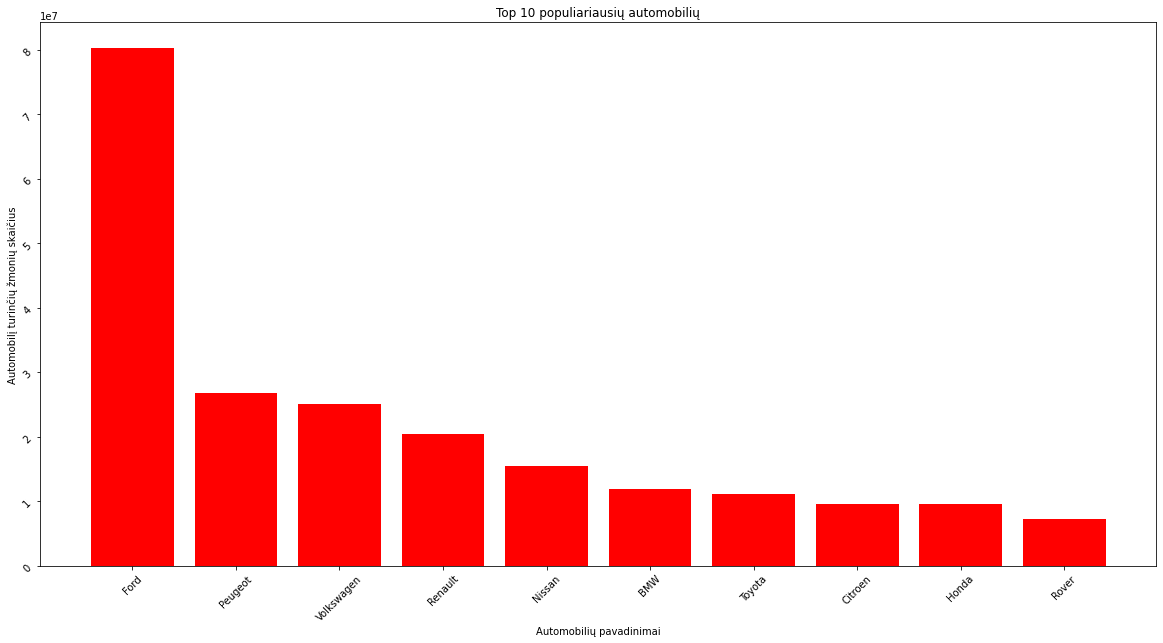

In [14]:
data_1_1 = data_1.iloc[0:10, :]

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(data_1_1['Manufacturer'], data_1_1['Total'], color='r')
ax.set_xlabel('Automobilių pavadinimai')
ax.set_ylabel('Automobilį turinčių žmonių skaičius')
ax.tick_params(labelrotation=45)
ax.set_title('Top 10 populiariausių automobilių')
plt.savefig('most_popular_cars', dpi=100)

In [15]:
################################################################### male female pagal kaina pasiskirstymas

In [16]:
data_2 = data.iloc[:, [2, -4, -3]]
data_2 = data_2.sort_values(['Price'])
data_2

,Price,Male,Female
397,3.332200,60.665,1152.319
111,3.781000,1525.677,1621.767
213,4.536000,1.295,361.000
396,4.626333,730.901,1846.300
171,4.968000,1671.380,1473.000
...,...,...,...
262,264.675000,143.077,2461.713
14,273.755000,24.625,1989.000
55,285.247000,52.397,5032.024
15,360.755000,25.375,2035.000


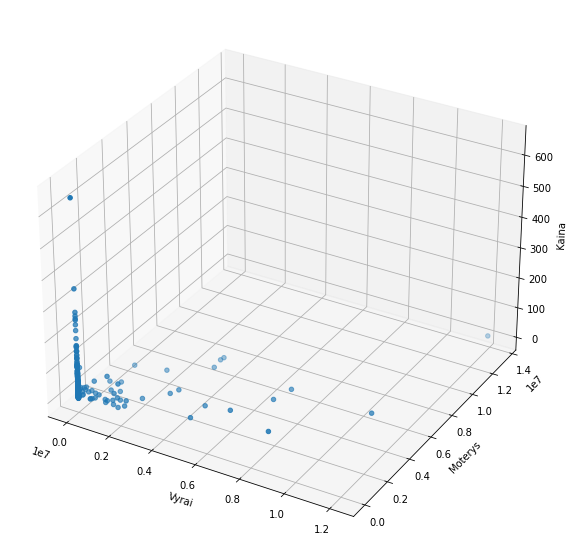

In [17]:
fig, ax  = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})
ax.scatter(data_2['Male'], data_2['Female'], data_2['Price'])
ax.set_xlabel('Vyrai')
ax.set_ylabel('Moterys')
ax.set_zlabel('Kaina')
plt.savefig('kainu_pasiskirstymas', dpi=100)



In [18]:
# padaryt kad butu 2 grafikai ir jie greta sudeti butu. Tada braizytu kaina ir kiek vyru/moteru isigije uz ta kaina masinas

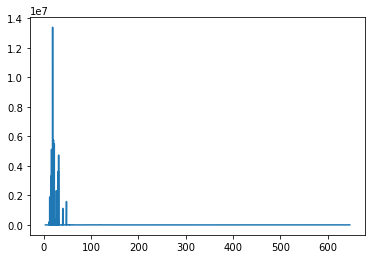

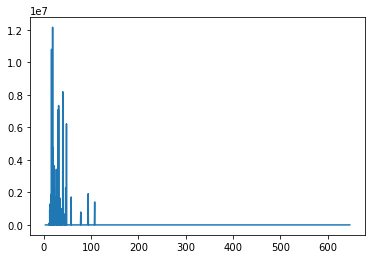

In [19]:
plt.plot(data_2['Price'], data_2['Female'])
plt.show()
plt.plot(data_2['Price'], data_2['Male'])
plt.show()

In [20]:
data_2['Female'].max()

13391971.0

In [21]:
data_2['Male'].max()

12150919.0

In [22]:
data_2['Price'].max()

646.605

In [1]:
class Graphics_plot:
    def __init__(self, data_x, data_y1, data_y2, x_name, y1_name, y2_name):
        self.data_x = data_x
        self.data_y1 = data_y1
        self.data_y2 = data_y2
        self.x_name = x_name
        self.y1_name = y1_name
        self.y2_name = y2_name

    def limits_y_axis(self): # suvienodina masteli y asiu
        y1_list = []
        y2_list = []
        for i in self.data_y1:
            y1_list.append(i)
        for j in self.data_y2:
            y2_list.append(j)
        if np.array(y2_list).max() >= np.array(y1_list).max():
            y_lim_max = np.array(y2_list).max() + np.array(y2_list).mean()/10
        else:
            y_lim_max = np.array(y1_list).max() + np.array(y1_list).mean()/10 
        if np.array(y2_list).min() <= np.array(y1_list).min():
            y_lim_min = np.array(y2_list).min() - np.array(y2_list).mean()/10
        else:
            y_lim_min = np.array(y1_list).min() - np.array(y1_list).mean()/10
        return y_lim_min, ', ', y_lim_max

    def limits_x_axis(self): # suvienodina masteli x asiu
        x1_list = []
        x2_list = []
        for i in self.data_x1:
            x1_list.append(i)
        for j in self.data_x2:
            x2_list.append(j)
        if np.array(x2_list).max() >= np.array(x1_list).max():
            x_lim_max = np.array(x2_list).max() + np.array(x2_list).mean()/10
        else:
            x_lim_max = np.array(x1_list).max() + np.array(x1_list).mean()/10 
        if np.array(x2_list).min() <= np.array(x1_list).min():
            x_lim_min = np.array(x2_list).min() - np.array(x2_list).mean()/10
        else:
            x_lim_min = np.array(x1_list).min() - np.array(x1_list).mean()/10
        return x_lim_min, ', ', x_lim_max
    
    def plot(self, name):
        path = r"C:\Users\ariju\Documents\pamokos\programavimas\atsiskaitymas\mfp_naujas"
        if not os.path.exists(path):
            os.mkdir(path)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
        ax1.scatter(self.data_x, self.data_y1, linewidth=3, color='b', alpha=1)
        ax2.scatter(self.data_x, self.data_y2, linewidth=3, marker='d', color='r', alpha=1)       
        ax1.spines["right"].set_visible(False)
        ax1.spines["top"].set_visible(False)
        ax2.spines["right"].set_visible(False)
        ax2.spines["top"].set_visible(False)
        ax1.tick_params(axis="y", direction="in")
        ax1.tick_params(axis="x", direction="in")
        ax2.tick_params(axis="y", direction="in")
        ax2.tick_params(axis="x", direction="in")
        ax1.set_xlabel (self.x_name, size=10, font="Arial")
        ax1.set_ylabel(self.y1_name, size=10, font="Arial")
        ax2.set_xlabel (self.x_name, size=10, font="Arial")
        ax2.set_ylabel(self.y2_name, size=10, font="Arial")
        ax1.set_xlim(3.3, 647)
        ax1.set_ylim(60, 2700)
        ax2.set_xlim(3.3, 647)
        ax2.set_ylim(60, 2700)
        # ax1.set_xlim(self.limits_x_axis)
        # ax1.set_ylim(self.limits_y_axis)
        # ax2.set_xlim(self.limits_y_axis)
        # ax2.set_ylim(self.limits_y_axis)
        plt.savefig(os.path.join(path, f'{name}.png'), dpi=200)
        plt.close()
        


   
def separate_graphs(data, x, y1, y2, x_name, y1_name, y2_name): # x, y1, y2 stulpeliu pavadinimai, data - duomenu dataframe'o pavadinimas, c_n - stulpelio numeris is kurio imamas eiluciu skaicius
    NUM = 1
    lim = int(data.shape[0])
    for i in tqdm.tqdm(range(0, lim + 1)):
        graphics_plot = Graphics_plot(x.iloc[0:i], 
                                      y1.iloc[0:i], 
                                      y2.iloc[0:i],
                                      x_name,
                                      y1_name,
                                      y2_name
                                     )
        name = '{num:02d}'.format(num=NUM)
        NUM += 1
        graphics_plot.plot(name)
        
separate_graphs(data_2, 
                data_2['Price'], 
                data_2['Male'], 
                data_2['Female'],
                'Kaina * 10^3 [EUR]',
                'Vyrai',
                'Moterys'
               )

In [24]:
filenames = glob.glob(r'C:\Users\ariju\Documents\pamokos\programavimas\atsiskaitymas\mfp_naujas\*.png')
filenames = sorted(filenames)
images = []
for filename in tqdm.tqdm(filenames):
    image = imageio.imread(filename)
    images.append(image)

imageio.mimsave(r'C:\Users\ariju\Documents\pamokos\programavimas\atsiskaitymas\gifas.gif', images, fps=30, duration=0.5)

In [25]:
############################################################# pabraizyt modeliu top 10 pagal piguma ir palygint su top10 perkamiausiu

In [26]:
data_3 = data.iloc[:, [0, 2]]
data_3 = data_3.groupby(['Manufacturer'], as_index=False).mean()
data_3 = data_3.sort_values(['Price'])
data_3

,Manufacturer,Price
33,Morris,6.938000
22,Lada,9.230933
49,Triumph,9.593667
13,Datsun,9.933169
10,Daewoo,16.442375
46,Suzuki,16.796190
42,Skoda,17.340498
9,Dacia,17.398333
11,Daihatsu,18.593025
16,Fiat,18.852969


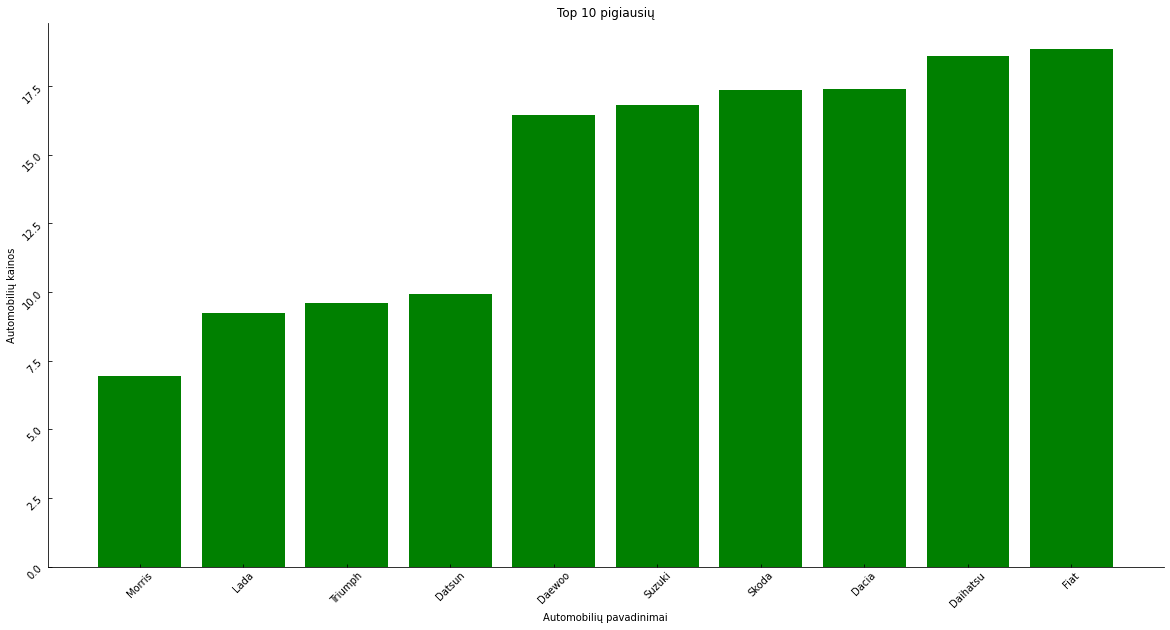

In [27]:
data_3_10 = data_3.iloc[0:10, :]

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(data_3_10['Manufacturer'], data_3_10['Price'], color='g')
ax.set_xlabel('Automobilių pavadinimai')
ax.set_ylabel('Automobilių kainos')
ax.tick_params(labelrotation=45, direction="in")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title('Top 10 pigiausių')
plt.savefig('cheapest_cars', dpi=200)

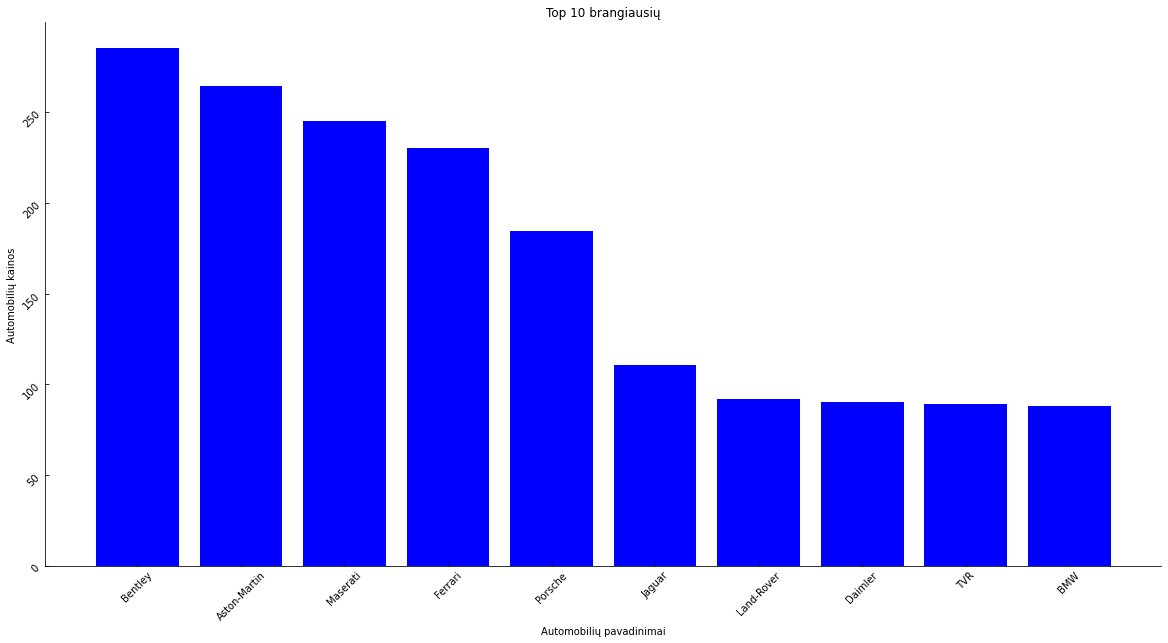

In [28]:
data_3_exp = data_3.iloc[-10:, :].sort_values(['Price'], ascending=False)

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(data_3_exp['Manufacturer'], data_3_exp['Price'], color='b')
ax.set_xlabel('Automobilių pavadinimai')
ax.set_ylabel('Automobilių kainos')
ax.tick_params(labelrotation=45, direction="in")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title('Top 10 brangiausių')
plt.savefig('expensive_cars', dpi=200)

In [29]:
################### Transmission nuo Power priklausomybe

In [30]:
data_4 = data.iloc[:, [3, 4]]
data_4

,Transmission,Power
0,5.000000,60.625000
1,5.000000,87.714286
2,5.000000,87.714286
3,5.193548,95.096774
4,5.000000,100.666667
...,...,...
497,5.176471,113.352941
498,7.304348,150.608696
499,6.181818,135.290909
500,6.444444,148.518518


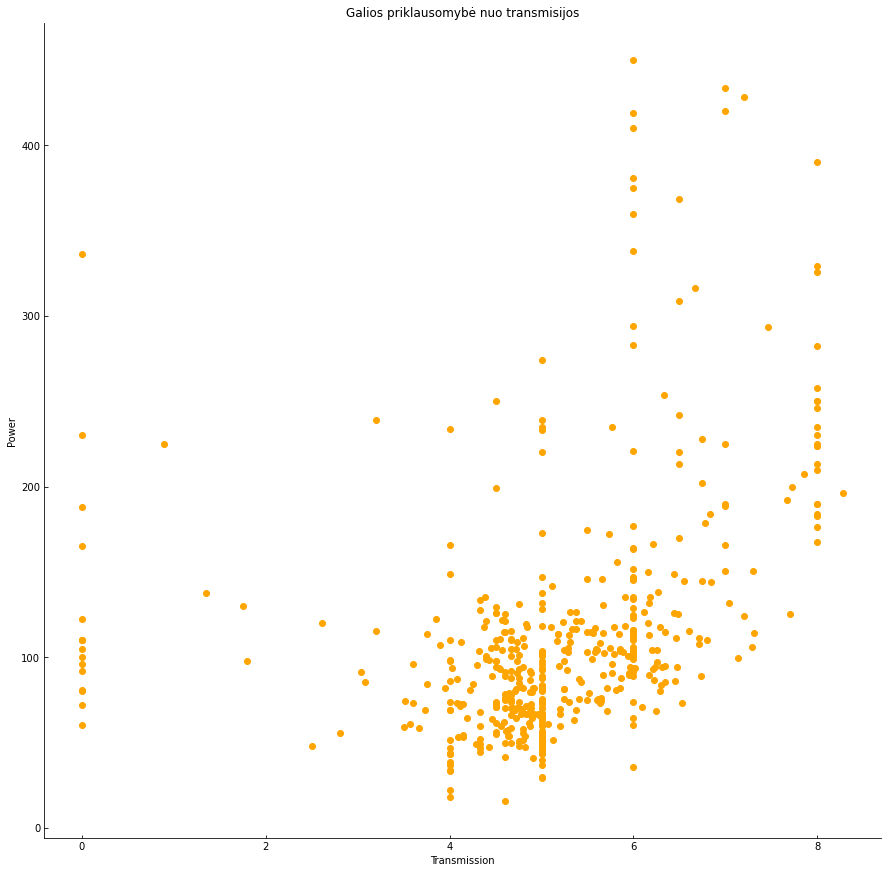

In [31]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(data_4['Transmission'], data_4['Power'], color='orange')
ax.set_xlabel('Transmission')
ax.set_ylabel('Power')
ax.tick_params(direction="in")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title('Galios priklausomybė nuo transmisijos')
plt.savefig('power_transmission', dpi=200)

In [32]:
################# Price Power priklausomybe

In [33]:
data_5 = data.iloc[:, [2, 4]]
data_5

,Price,Power
0,21.105625,60.625000
1,17.427143,87.714286
2,18.198429,87.714286
3,25.343387,95.096774
4,23.909333,100.666667
...,...,...
497,36.524191,113.352941
498,50.484130,150.608696
499,50.961091,135.290909
500,58.469074,148.518518


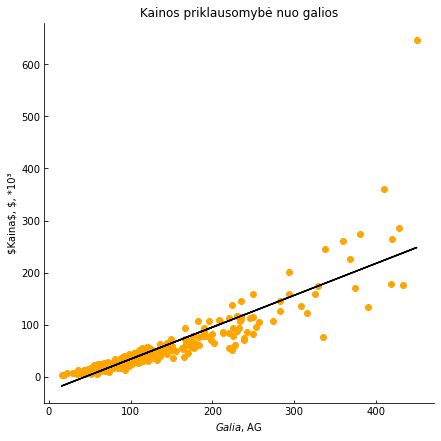

In [34]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter(data_5['Power'], data_5['Price'], color='orange')
ax.set_xlabel('$Galia$, AG')
ax.set_ylabel('$Kaina$, $, *10³')
ax.tick_params(direction="in")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title('Kainos priklausomybė nuo galios')
function = np.poly1d(np.polyfit(data_5['Power'], data_5['Price'], 1))
ax.plot(data_5['Power'], function(data_5['Power']), color="black")
plt.savefig('price_power', dpi=200)

Text(0.5, 1.0, 'Kainos priklausomybė nuo galios')

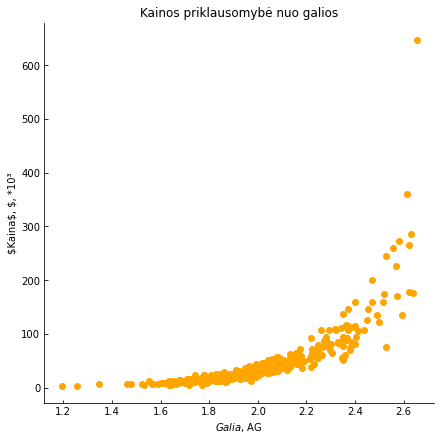

In [35]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter(np.log10(data_5['Power']), data_5['Price'], color='orange')
ax.set_xlabel('$Galia$, AG')
ax.set_ylabel('$Kaina$, $, *10³')
ax.tick_params(direction="in")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title('Kainos priklausomybė nuo galios')

In [36]:
data

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Abarth,500C,21.105625,5.000000,60.625000,1039.500000,petrol,7.124,653.070,570.000,12.413
1,Alfa-Romeo,145,17.427143,5.000000,87.714286,1696.428571,petrol,1754.267,6311.549,2186.000,44.034
2,Alfa-Romeo,146,18.198429,5.000000,87.714286,1696.428571,petrol,1745.222,3780.461,2969.000,58.128
3,Alfa-Romeo,147,25.343387,5.193548,95.096774,1802.774194,petrol,149.499,83.501,2215.074,246.278
4,Alfa-Romeo,155,23.909333,5.000000,100.666667,2016.777778,petrol,883.005,4422.000,1191.000,34.473
...,...,...,...,...,...,...,...,...,...,...,...
497,Volvo,V50,36.524191,5.176471,113.352941,2106.500000,petrol,154.491,449.406,1879.292,227.447
498,Volvo,V60,50.484130,7.304348,150.608696,1969.000000,diesel,7.831,880.290,720.000,10.720
499,Volvo,V70,50.961091,6.181818,135.290909,1971.163636,diesel,703.323,587.631,1478.078,928.874
500,Volvo,XC70,58.469074,6.444444,148.518518,2174.037037,diesel,839.749,2172.313,5608.000,83.607


In [37]:
predict_data = data.iloc[:, [2, 4, 5]]
predict_data

,Price,Power,Engine CC
0,21.105625,60.625000,1039.500000
1,17.427143,87.714286,1696.428571
2,18.198429,87.714286,1696.428571
3,25.343387,95.096774,1802.774194
4,23.909333,100.666667,2016.777778
...,...,...,...
497,36.524191,113.352941,2106.500000
498,50.484130,150.608696,1969.000000
499,50.961091,135.290909,1971.163636
500,58.469074,148.518518,2174.037037


In [38]:
predict_data['Price'].mean()

41.50487473874703

In [39]:
predict_data = predict_data.round()

In [40]:
predict_data.loc[predict_data['Price'] <= 40 , 'Price'] = 0 # maziau lygu 40k - 0
predict_data.loc[predict_data['Price'] > 40 , 'Price'] = 1 # daugiau uz 40k - 1

In [41]:
predict_data = predict_data.astype(int)

In [42]:
predict_data = predict_data.sort_values(['Price'], ascending=True)

In [43]:
predict_data

,Price,Power,Engine CC
0,0,61,1040
323,0,67,1699
322,0,56,1607
320,0,73,1242
319,0,80,1536
...,...,...,...
253,1,106,1545
82,1,123,1832
251,1,136,2972
258,1,144,2418


In [44]:
X_input = predict_data.drop(columns=['Price']).values
Y_output = predict_data['Price'].values 

X_input_train, X_input_test, Y_output_train, Y_output_test = train_test_split(X_input, Y_output, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_input_train, Y_output_train)
predictions = model.predict(X_input_test)

score = accuracy_score(Y_output_test, predictions)
score

0.8811881188118812

In [45]:
# X_input = predict_data.drop(columns=['Price']) ############################### padaro kodas medi tikimybini
# Y_output = predict_data['Price'] 

# model = DecisionTreeClassifier()
# model.fit(X_input.values, Y_output.values)

# # Y_output = Y_output.astype(str)

# tree.export_graphviz(model, 
#                      out_file='price-predictor.dot', 
#                      feature_names=['Power', 'Engine CC'],
#                      class_names=sorted(Y_output.unique()),
#                      label='all',
#                      rounded=True,
#                      filled=True
#                     )

In [46]:
X_input = predict_data.drop(columns=['Price'])
Y_output = predict_data['Price'] 

model = DecisionTreeClassifier()
model.fit(X_input.values, Y_output.values)

predictions = model.predict([[132, 1850]])

if predictions == 0:
    print('Automobilis kainuoja ne daugiau 40.000€')
else:
    print('Automobilis kainuoja daugiau nei 40.000€')

Automobilis kainuoja daugiau nei 40.000€


In [47]:
data

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Abarth,500C,21.105625,5.000000,60.625000,1039.500000,petrol,7.124,653.070,570.000,12.413
1,Alfa-Romeo,145,17.427143,5.000000,87.714286,1696.428571,petrol,1754.267,6311.549,2186.000,44.034
2,Alfa-Romeo,146,18.198429,5.000000,87.714286,1696.428571,petrol,1745.222,3780.461,2969.000,58.128
3,Alfa-Romeo,147,25.343387,5.193548,95.096774,1802.774194,petrol,149.499,83.501,2215.074,246.278
4,Alfa-Romeo,155,23.909333,5.000000,100.666667,2016.777778,petrol,883.005,4422.000,1191.000,34.473
...,...,...,...,...,...,...,...,...,...,...,...
497,Volvo,V50,36.524191,5.176471,113.352941,2106.500000,petrol,154.491,449.406,1879.292,227.447
498,Volvo,V60,50.484130,7.304348,150.608696,1969.000000,diesel,7.831,880.290,720.000,10.720
499,Volvo,V70,50.961091,6.181818,135.290909,1971.163636,diesel,703.323,587.631,1478.078,928.874
500,Volvo,XC70,58.469074,6.444444,148.518518,2174.037037,diesel,839.749,2172.313,5608.000,83.607


In [48]:
data_gender = data.iloc[:, [7, 8, 9]]
data_gender = data_gender.sum()

data_gender

Male       1.181561e+08
Female     6.936266e+07
Unknown    1.198816e+06
dtype: float64

In [49]:
data_gender= pd.DataFrame({'Gender':['Male', 'Female', 'Unknown']})
data_gender['Count']= data_gender['Gender'].apply(lambda x: data[x].sum())

data_gender

,Gender,Count
0,Male,1.181561e+08
1,Female,6.936266e+07
2,Unknown,1.198816e+06


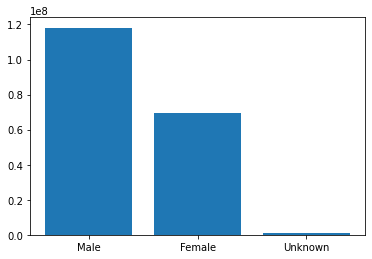

In [50]:
plt.bar(data_gender['Gender'], data_gender['Count'])
plt.savefig('pasiskirstymasmfu', dpi=200)

In [51]:
#################################### NAUJI DUOMENYS

In [52]:
data_audi = pd.read_csv('skelbimai/audi.csv', usecols=[0, 1, 2, 4, 5, 7, 8])
data_bmw = pd.read_csv('skelbimai/bmw.csv', usecols=[0, 1, 2, 4, 5, 7, 8])
data_ford = pd.read_csv('skelbimai/ford.csv', usecols=[0, 1, 2, 4, 5, 7, 8])
data_hyundai = pd.read_csv('skelbimai/hyundi.csv', usecols=[0, 1, 2, 4, 5, 7, 8])
data_mercedes = pd.read_csv('skelbimai/merc.csv', usecols=[0, 1, 2, 4, 5, 7, 8])
data_skoda = pd.read_csv('skelbimai/skoda.csv', usecols=[0, 1, 2, 4, 5, 7, 8])
data_toyota = pd.read_csv('skelbimai/toyota.csv', usecols=[0, 1, 2, 4, 5, 7, 8])
data_vauxhall = pd.read_csv('skelbimai/vauxhall.csv', usecols=[0, 1, 2, 4, 5, 7, 8])
data_vw = pd.read_csv('skelbimai/vw.csv', usecols=[0, 1, 2, 4, 5, 7, 8])

In [53]:
data_list = [data_audi, data_bmw, data_ford, data_hyundai, data_mercedes, data_skoda, data_toyota, data_vauxhall, data_vw]
new_names_list = ['Audi', 'Bmw', 'Ford', 'Hyundai', 'Mercedes', 'Skoda', 'Toyota', 'Vauxhall', 'Volkswagen'] 

In [54]:
# Gallon Per Hour (GPH) = (specific fuel consumption x HP)/Fuel Specific Weight
# diesel --> power = (7.2 * 60 / mpg) / 0.045 * 0.7457
# petrol --> power = (6.1 * 60 / mpg) / 0.55 * 0.7457

In [55]:
class New_data_cleaning:
    def __init__(self, data_name):
        self.data_name = data_name  
        
    def rename_column_values(self, col_title, new_col_values_name):
        self.data_name.loc[self.data_name[col_title] != new_col_values_name, col_title] = new_col_values_name
    
    def miles_to_km(self, col_title):
        self.data_name[col_title] = self.data_name[col_title] * 1.61
        self.data_name[col_title] = self.data_name[col_title].round()
        
    def pounds_to_eur(self, col_title):
        self.data_name[col_title] = self.data_name[col_title] * 1.17
        self.data_name[col_title] = self.data_name[col_title].round()
        
    def mpg_to_power(self, col_title_with_fuel, col_title_with_mpg):
        self.data_name.loc[self.data_name[col_title_with_fuel] == 'Petrol', col_title_with_mpg] = ((6.1 * (60 / self.data_name[col_title_with_mpg])) / 0.045) * 0.7457
        self.data_name.loc[self.data_name[col_title_with_fuel] == 'Diesel', col_title_with_mpg] = ((7.2 * (60 / self.data_name[col_title_with_mpg])) / 0.055) * 0.7457
        self.data_name.drop(self.data_name.loc[self.data_name[col_title_with_fuel] == 'Hybrid'].index, inplace=True)
        self.data_name.drop(self.data_name.loc[self.data_name[col_title_with_fuel] == 'Other'].index, inplace=True)
        self.data_name.drop(self.data_name.loc[self.data_name[col_title_with_fuel] == 'Electric'].index, inplace=True)
        self.data_name[col_title_with_mpg] = self.data_name[col_title_with_mpg].round()
        
for i in tqdm.tqdm(range(0, 9)):
    new_data_cleaning = New_data_cleaning(data_list[i])
    new_data_cleaning.rename_column_values('model', new_names_list[i])
    new_data_cleaning.miles_to_km('mileage')
    new_data_cleaning.pounds_to_eur('price')
    new_data_cleaning.mpg_to_power('fuelType', 'mpg')

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 108.38it/s]


In [56]:
data_cars = pd.concat(data_list)
data_cars

,model,year,price,mileage,fuelType,mpg,engineSize
0,Audi,2017,14625.0,25333.0,Petrol,109.0,1.4
1,Audi,2016,19305.0,58287.0,Diesel,91.0,2.0
2,Audi,2016,12870.0,48213.0,Petrol,109.0,1.4
3,Audi,2017,19656.0,41783.0,Diesel,87.0,2.0
4,Audi,2019,20241.0,3217.0,Petrol,122.0,1.0
...,...,...,...,...,...,...,...
15152,Volkswagen,2012,7008.0,119140.0,Diesel,99.0,2.0
15153,Volkswagen,2008,2105.0,141844.0,Petrol,131.0,1.2
15154,Volkswagen,2009,1860.0,112700.0,Petrol,144.0,1.4
15155,Volkswagen,2006,1462.0,133153.0,Petrol,131.0,1.2


In [57]:
data_cars = data_cars.rename(columns={'model': 'Manufacturer', 
                                      'year': 'Year', 
                                      'price': 'Price', 
                                      'mileage': 'Distance_km', 
                                      'fuelType': 'Fuel', 
                                      'mpg': 'Power', 
                                      'engineSize': 'Engine_size'
                                     })
data_cars

,Manufacturer,Year,Price,Distance_km,Fuel,Power,Engine_size
0,Audi,2017,14625.0,25333.0,Petrol,109.0,1.4
1,Audi,2016,19305.0,58287.0,Diesel,91.0,2.0
2,Audi,2016,12870.0,48213.0,Petrol,109.0,1.4
3,Audi,2017,19656.0,41783.0,Diesel,87.0,2.0
4,Audi,2019,20241.0,3217.0,Petrol,122.0,1.0
...,...,...,...,...,...,...,...
15152,Volkswagen,2012,7008.0,119140.0,Diesel,99.0,2.0
15153,Volkswagen,2008,2105.0,141844.0,Petrol,131.0,1.2
15154,Volkswagen,2009,1860.0,112700.0,Petrol,144.0,1.4
15155,Volkswagen,2006,1462.0,133153.0,Petrol,131.0,1.2


In [58]:
data.drop(data.loc[data['Fuel'] == ('automatic' or 'Automatic' or 'other' or 'Other')].index, inplace=True)
data

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Abarth,500C,21.105625,5.000000,60.625000,1039.500000,petrol,7.124,653.070,570.000,12.413
1,Alfa-Romeo,145,17.427143,5.000000,87.714286,1696.428571,petrol,1754.267,6311.549,2186.000,44.034
2,Alfa-Romeo,146,18.198429,5.000000,87.714286,1696.428571,petrol,1745.222,3780.461,2969.000,58.128
3,Alfa-Romeo,147,25.343387,5.193548,95.096774,1802.774194,petrol,149.499,83.501,2215.074,246.278
4,Alfa-Romeo,155,23.909333,5.000000,100.666667,2016.777778,petrol,883.005,4422.000,1191.000,34.473
...,...,...,...,...,...,...,...,...,...,...,...
497,Volvo,V50,36.524191,5.176471,113.352941,2106.500000,petrol,154.491,449.406,1879.292,227.447
498,Volvo,V60,50.484130,7.304348,150.608696,1969.000000,diesel,7.831,880.290,720.000,10.720
499,Volvo,V70,50.961091,6.181818,135.290909,1971.163636,diesel,703.323,587.631,1478.078,928.874
500,Volvo,XC70,58.469074,6.444444,148.518518,2174.037037,diesel,839.749,2172.313,5608.000,83.607


In [59]:
data_add = data.drop(columns=['Model', 'Transmission', 'Male', 'Female', 'Unknown', 'Total']) 

In [60]:
data_add = data_add.rename(columns={'Engine CC': 'Engine_size'})
data_add['Engine_size'] = data_add['Engine_size'] * 0.06101 * 0.01639
data_add['Price'] = data_add['Price'] * 1000
data_add['Price'] = data_add['Price'].round() 
data_add['Power'] = data_add['Power'].round() 
data_add['Engine_size'] = data_add['Engine_size'].round()
data_add['Fuel'] = data_add['Fuel'].str.capitalize()

In [61]:
data_add

,Manufacturer,Price,Power,Engine_size,Fuel
0,Abarth,21106.0,61.0,1.0,Petrol
1,Alfa-Romeo,17427.0,88.0,2.0,Petrol
2,Alfa-Romeo,18198.0,88.0,2.0,Petrol
3,Alfa-Romeo,25343.0,95.0,2.0,Petrol
4,Alfa-Romeo,23909.0,101.0,2.0,Petrol
...,...,...,...,...,...
497,Volvo,36524.0,113.0,2.0,Petrol
498,Volvo,50484.0,151.0,2.0,Diesel
499,Volvo,50961.0,135.0,2.0,Diesel
500,Volvo,58469.0,149.0,2.0,Diesel


In [62]:
class Manage_cols():
    def __init__(self, df):
        self.df = df
    
    def add_new_col(self, new_col_location, new_col_name, new_col_value):
        self.df.insert(loc=new_col_location,
                       column=new_col_name,
                       value=new_col_value
                       )

    def swap_columns(self, col_1, col_2):
        col_list = list(self.df.columns)
        x, y = col_list.index(col_1), col_list.index(col_2)
        col_list[y], col_list[x] = col_list[x], col_list[y]
        self.df = self.df[col_list]  
        return self.df

manage_cols = Manage_cols(data_add)
manage_cols.add_new_col(1, 'Year', 2022)
manage_cols.add_new_col(3, 'Distance_km', 0)
data_add = manage_cols.swap_columns('Power', 'Fuel')
data_add = manage_cols.swap_columns('Engine_size', 'Power')

In [63]:
data_add

,Manufacturer,Year,Price,Distance_km,Fuel,Power,Engine_size
0,Abarth,2022,21106.0,0,Petrol,61.0,1.0
1,Alfa-Romeo,2022,17427.0,0,Petrol,88.0,2.0
2,Alfa-Romeo,2022,18198.0,0,Petrol,88.0,2.0
3,Alfa-Romeo,2022,25343.0,0,Petrol,95.0,2.0
4,Alfa-Romeo,2022,23909.0,0,Petrol,101.0,2.0
...,...,...,...,...,...,...,...
497,Volvo,2022,36524.0,0,Petrol,113.0,2.0
498,Volvo,2022,50484.0,0,Diesel,151.0,2.0
499,Volvo,2022,50961.0,0,Diesel,135.0,2.0
500,Volvo,2022,58469.0,0,Diesel,149.0,2.0


In [64]:
data_cars

,Manufacturer,Year,Price,Distance_km,Fuel,Power,Engine_size
0,Audi,2017,14625.0,25333.0,Petrol,109.0,1.4
1,Audi,2016,19305.0,58287.0,Diesel,91.0,2.0
2,Audi,2016,12870.0,48213.0,Petrol,109.0,1.4
3,Audi,2017,19656.0,41783.0,Diesel,87.0,2.0
4,Audi,2019,20241.0,3217.0,Petrol,122.0,1.0
...,...,...,...,...,...,...,...
15152,Volkswagen,2012,7008.0,119140.0,Diesel,99.0,2.0
15153,Volkswagen,2008,2105.0,141844.0,Petrol,131.0,1.2
15154,Volkswagen,2009,1860.0,112700.0,Petrol,144.0,1.4
15155,Volkswagen,2006,1462.0,133153.0,Petrol,131.0,1.2


In [65]:
data_cars = pd.concat([data_add, data_cars])
data_cars

,Manufacturer,Year,Price,Distance_km,Fuel,Power,Engine_size
0,Abarth,2022,21106.0,0.0,Petrol,61.0,1.0
1,Alfa-Romeo,2022,17427.0,0.0,Petrol,88.0,2.0
2,Alfa-Romeo,2022,18198.0,0.0,Petrol,88.0,2.0
3,Alfa-Romeo,2022,25343.0,0.0,Petrol,95.0,2.0
4,Alfa-Romeo,2022,23909.0,0.0,Petrol,101.0,2.0
...,...,...,...,...,...,...,...
15152,Volkswagen,2012,7008.0,119140.0,Diesel,99.0,2.0
15153,Volkswagen,2008,2105.0,141844.0,Petrol,131.0,1.2
15154,Volkswagen,2009,1860.0,112700.0,Petrol,144.0,1.4
15155,Volkswagen,2006,1462.0,133153.0,Petrol,131.0,1.2


In [66]:
car_names = []
for i in data_cars['Manufacturer']:
    if i not in car_names:
        car_names.append(i)

In [67]:
# car_names = []
# [car_names.append(i) for i in data_cars['Manufacturer'] if i not in car_names]

In [68]:
car_names

['Abarth',
 'Alfa-Romeo',
 'Aston-Martin',
 'Audi',
 'BMW',
 'Bentley',
 'Chevrolet',
 'Chrysler',
 'Citroen',
 'Dacia',
 'Daewoo',
 'Daihatsu',
 'Daimler',
 'Datsun',
 'Dodge',
 'Ferrari',
 'Fiat',
 'Ford',
 'Honda',
 'Hyundai',
 'Jaguar',
 'Kia',
 'Lada',
 'Lancia',
 'Land-Rover',
 'Lexus',
 'Lotus',
 'MG',
 'Maserati',
 'Mazda',
 'Mercedes',
 'Mini',
 'Mitsubishi',
 'Morris',
 'Nissan',
 'Opel',
 'Peugeot',
 'Porsche',
 'Renault',
 'Rover',
 'Saab',
 'Seat',
 'Skoda',
 'Smart',
 'Ssangyong',
 'Subaru',
 'Suzuki',
 'TVR',
 'Toyota',
 'Triumph',
 'Volkswagen',
 'Volvo',
 'Bmw',
 'Vauxhall']

In [69]:
################## neuroninis tinklas

In [70]:
data_cars = data_cars.drop(columns=['Manufacturer'])

In [71]:
data_cars.loc[data_cars['Fuel'] == 'Petrol', 'Fuel'] = 0 # petrol = 0
data_cars.loc[data_cars['Fuel'] == 'Diesel', 'Fuel'] = 1 # diesel = 1

In [72]:
# manufacturer_name_to_id = {}
# idx = 0
# for i in car_names:
#     manufacturer_name_to_id.update({i: idx})
#     idx += 1

In [73]:
# manufacturer_name_to_id

In [74]:
data_cars.dtypes

Year             int64
Price          float64
Distance_km    float64
Fuel            object
Power          float64
Engine_size    float64
dtype: object

In [75]:
data_cars['Year'] = data_cars['Year'].astype('float')
data_cars['Fuel'] = data_cars['Fuel'].astype('float')

In [76]:
# data_cars['Year'] = data_cars['Year'] / 2022
# data_cars['Price'] = data_cars['Price'] / 646605
# data_cars['Distance_km'] = data_cars['Distance_km'] / 520030
# data_cars['Engine_size'] = data_cars['Engine_size'] / 6.6
# data_cars['Power'] = data_cars['Power'] / 20217

In [77]:
data_cars

,Year,Price,Distance_km,Fuel,Power,Engine_size
0,2022.0,21106.0,0.0,0.0,61.0,1.0
1,2022.0,17427.0,0.0,0.0,88.0,2.0
2,2022.0,18198.0,0.0,0.0,88.0,2.0
3,2022.0,25343.0,0.0,0.0,95.0,2.0
4,2022.0,23909.0,0.0,0.0,101.0,2.0
...,...,...,...,...,...,...
15152,2012.0,7008.0,119140.0,1.0,99.0,2.0
15153,2008.0,2105.0,141844.0,0.0,131.0,1.2
15154,2009.0,1860.0,112700.0,0.0,144.0,1.4
15155,2006.0,1462.0,133153.0,0.0,131.0,1.2


In [78]:
print(data_cars['Price'].max())
print(data_cars['Price'].mean())
print(data_cars['Price'].min())

646605.0
19680.81250194597
526.0


In [79]:
# (0-5] k --> 0
# (5-10] k --> 1
# (10-15] k --> 2
# (15-20] k --> 3
# (20-25] k --> 4
# (25-35] k --> 5
# (35<=] k --> 6

In [80]:
def price_to_index(start, end, idx):
    data_cars.loc[(data_cars['Price']  > start) & (data_cars['Price'] <= end), 'Price'] = idx

# price_to_index(0, 5000, 0)
# price_to_index(5000, 10000, 1)
# price_to_index(10000, 15000, 2)
# price_to_index(15000, 20000, 3)
# price_to_index(20000, 25000, 4)
# price_to_index(25000, 35000, 5)
# price_to_index(35000, 5000000, 6)

In [81]:
price_to_index(0, 20000, 0)
price_to_index(20000, 200000000, 1)

In [82]:
data_cars

,Year,Price,Distance_km,Fuel,Power,Engine_size
0,2022.0,1.0,0.0,0.0,61.0,1.0
1,2022.0,0.0,0.0,0.0,88.0,2.0
2,2022.0,0.0,0.0,0.0,88.0,2.0
3,2022.0,1.0,0.0,0.0,95.0,2.0
4,2022.0,1.0,0.0,0.0,101.0,2.0
...,...,...,...,...,...,...
15152,2012.0,0.0,119140.0,1.0,99.0,2.0
15153,2008.0,0.0,141844.0,0.0,131.0,1.2
15154,2009.0,0.0,112700.0,0.0,144.0,1.4
15155,2006.0,0.0,133153.0,0.0,131.0,1.2


In [83]:
tf.convert_to_tensor(data_cars)

<tf.Tensor: shape=(96353, 6), dtype=float64, numpy=
array([[2.02200e+03, 1.00000e+00, 0.00000e+00, 0.00000e+00, 6.10000e+01,
        1.00000e+00],
       [2.02200e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 8.80000e+01,
        2.00000e+00],
       [2.02200e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 8.80000e+01,
        2.00000e+00],
       ...,
       [2.00900e+03, 0.00000e+00, 1.12700e+05, 0.00000e+00, 1.44000e+02,
        1.40000e+00],
       [2.00600e+03, 0.00000e+00, 1.33153e+05, 0.00000e+00, 1.31000e+02,
        1.20000e+00],
       [2.00700e+03, 0.00000e+00, 1.19140e+05, 0.00000e+00, 1.31000e+02,
        1.20000e+00]])>

In [84]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(data_cars.drop(columns=['Price']))

In [85]:
normalizer(data_cars.drop(columns=['Price']).iloc[:3])

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 2.2651272 , -1.081996  , -0.86067873, -0.75479716, -1.1706171 ],
       [ 2.2651272 , -1.081996  , -0.86067873, -0.38674808,  0.5978566 ],
       [ 2.2651272 , -1.081996  , -0.86067873, -0.38674808,  0.5978566 ]],
      dtype=float32)>

In [86]:
x_data = data_cars.drop(columns=['Price'])
y_data = data_cars['Price']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [87]:
data_cars.shape

(96353, 6)

In [88]:
n = 50

model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=round((n+1)/2), activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=round((n+1)/4), activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=1, activation='relu')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              optimizer='adam', 
              metrics=['accuracy'])

val_accuracy_list = []

while len(val_accuracy_list) < 10:
    history = model.fit(x_train,
                        y_train,
                        batch_size=50,
                        epochs=100,
                        validation_data=(x_test, y_test))
    val_accuracy_list.append(history.history['val_accuracy'])

Epoch 1/100
1349/1349 [==============================] - 2s 1ms/step - loss: 0.5790 - accuracy: 0.8475 - val_loss: 0.5567 - val_accuracy: 0.8710
Epoch 2/100
1349/1349 [==============================] - 2s 1ms/step - loss: 0.5610 - accuracy: 0.8684 - val_loss: 0.5549 - val_accuracy: 0.8735
Epoch 3/100
1349/1349 [==============================] - 1s 1ms/step - loss: 0.5591 - accuracy: 0.8707 - val_loss: 0.5531 - val_accuracy: 0.8768
Epoch 4/100
1349/1349 [==============================] - 2s 1ms/step - loss: 0.5574 - accuracy: 0.8741 - val_loss: 0.5509 - val_accuracy: 0.8773
Epoch 5/100
1349/1349 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.8756 - val_loss: 0.5496 - val_accuracy: 0.8783
Epoch 6/100
1349/1349 [==============================] - 1s 1ms/step - loss: 0.5528 - accuracy: 0.8774 - val_loss: 0.5478 - val_accuracy: 0.8790
Epoch 7/100
1349/1349 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.8787 - val_loss: 0.5466 - val_ac

In [89]:
len(val_accuracy_list)

10

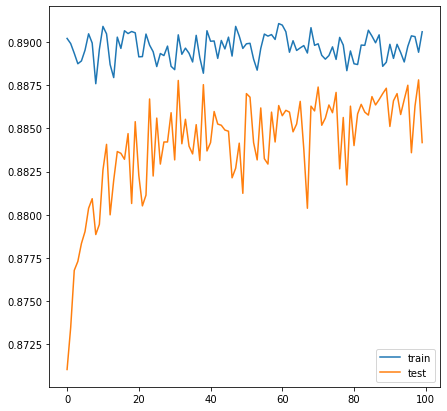

In [90]:
plt.figure(figsize=(7, 7))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.savefig('accuracy_entropy.jpg', dpi=200)

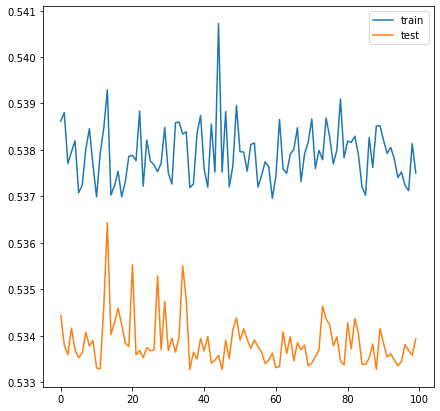

In [91]:
plt.figure(figsize=(7, 7))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.savefig('loss_entropy.jpg', dpi=200)

In [92]:
n = 50

model2 = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=round((n+1)/2), activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=round((n+1)/4), activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=1, activation='relu')
])

model2.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['accuracy'])

val_accuracy_list2 = []

while len(val_accuracy_list2) < 10:
    history2 = model2.fit(x_train,
                        y_train,
                        batch_size=50,
                        epochs=100,
                       validation_data=(x_test, y_test))
    val_accuracy_list2.append(history2.history['val_accuracy'])

Epoch 1/100
1349/1349 [==============================] - 2s 1ms/step - loss: 0.1216 - accuracy: 0.8344 - val_loss: 0.0935 - val_accuracy: 0.8719
Epoch 2/100
1349/1349 [==============================] - 1s 1ms/step - loss: 0.0960 - accuracy: 0.8712 - val_loss: 0.0882 - val_accuracy: 0.8749
Epoch 3/100
1349/1349 [==============================] - 1s 1ms/step - loss: 0.0936 - accuracy: 0.8749 - val_loss: 0.0870 - val_accuracy: 0.8761
Epoch 4/100
1349/1349 [==============================] - 1s 1ms/step - loss: 0.0898 - accuracy: 0.8781 - val_loss: 0.0848 - val_accuracy: 0.8838
Epoch 5/100
1349/1349 [==============================] - 1s 1ms/step - loss: 0.0883 - accuracy: 0.8806 - val_loss: 0.0842 - val_accuracy: 0.8874
Epoch 6/100
1349/1349 [==============================] - 1s 1ms/step - loss: 0.0864 - accuracy: 0.8838 - val_loss: 0.0830 - val_accuracy: 0.8870
Epoch 7/100
1349/1349 [==============================] - 1s 1ms/step - loss: 0.0879 - accuracy: 0.8854 - val_loss: 0.0814 - val_ac

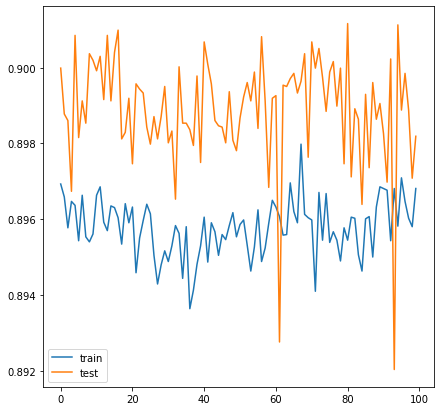

In [93]:
plt.figure(figsize=(7, 7))
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.legend()
plt.savefig('accuracy_mean_s_e.jpg', dpi=200)

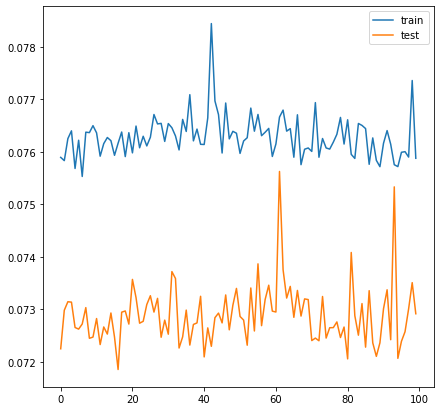

In [94]:
plt.figure(figsize=(7, 7))
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.savefig('loss_mean_s_e.jpg', dpi=200)

In [95]:
y_predict = model(x_train)
y_predict

<tf.Tensor: shape=(67447, 1), dtype=float32, numpy=
array([[0.       ],
       [1.1922374],
       [0.       ],
       ...,
       [4.780798 ],
       [0.       ],
       [0.       ]], dtype=float32)>

Text(0, 0.5, 'true')

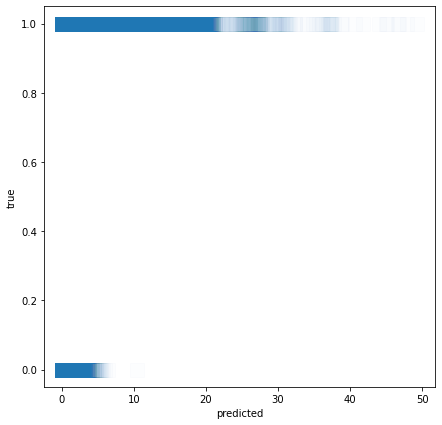

In [96]:
plt.figure(figsize=(7, 7))
plt.scatter(y_predict, y_train, s=200, marker='s', alpha=0.01)
plt.xlabel('predicted')
plt.ylabel('true')

In [112]:
for i in range(0, 10):
    val_accuracy_list[i] = sum(val_accuracy_list[i]) / 100

In [114]:
for i in range(0, 10):
    val_accuracy_list2[i] = sum(val_accuracy_list2[i]) / 100

In [113]:
val_accuracy_list

[0.8840642064809799,
 0.8866186940670013,
 0.8903604763746261,
 0.8908493053913117,
 0.890832349061966,
 0.891294886469841,
 0.8907174974679947,
 0.8913187605142593,
 0.8917460054159164,
 0.8915069508552551]

In [115]:
val_accuracy_list2

[0.8915581548213959,
 0.8970635843276977,
 0.897506052851677,
 0.8975582921504974,
 0.8982560712099076,
 0.8984875082969666,
 0.8987352114915848,
 0.8989365547895432,
 0.8994035828113556,
 0.8988984972238541]

In [119]:
score_list = []
while len(score_list) != 10:
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    score = accuracy_score(y_test, predictions)
    score_list.append(score)

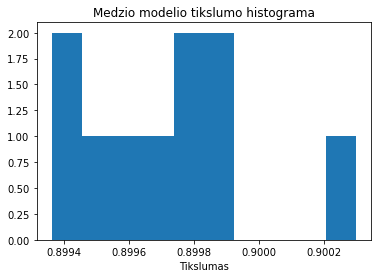

In [137]:
plt.hist(score_list)
plt.xlabel('Tikslumas')
plt.title('Medzio modelio tikslumo histograma')
plt.savefig('tree_hist.png')

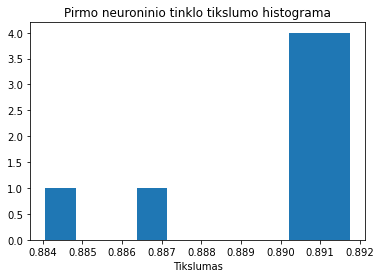

In [138]:
plt.hist(val_accuracy_list)
plt.xlabel('Tikslumas')
plt.title('Pirmo neuroninio tinklo tikslumo histograma')
plt.savefig('model_hist.png')

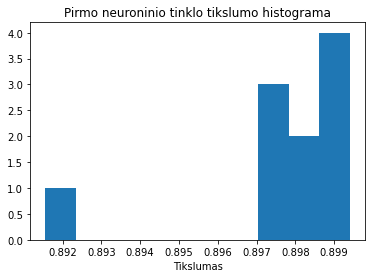

In [135]:
plt.hist(val_accuracy_list2)
plt.xlabel('Tikslumas')
plt.title('Antro neuroninio tinklo tikslumo histograma')
plt.savefig('model2_hist.png', dpi=200)

In [125]:
score_mean = sum(score_list) / len(score_list)
score_mean = score_mean.round(3)

In [126]:
model1_mean = sum(history.history['val_accuracy']) / len(history.history['val_accuracy'])
model1_mean = round(model1_mean, 3)

In [127]:
model2_mean = sum(history2.history['val_accuracy']) / len(history2.history['val_accuracy'])
model2_mean = round(model2_mean, 3)

In [128]:
print('Medzio klasifikavimo rezultatas yra', score_mean)
print('1 neuroninio tinklo klasifikavimo rezultatas yra', model1_mean)
print('2 neuroninio tinklo klasifikavimo rezultatas yra', model2_mean)

Medzio klasifikavimo rezultatas yra 0.9
1 neuroninio tinklo klasifikavimo rezultatas yra 0.892
2 neuroninio tinklo klasifikavimo rezultatas yra 0.899


In [103]:
model = DecisionTreeClassifier()
model.fit(x_data, y_data)
predictions = model.predict(x_data)

y_data = y_data.astype(str)

tree.export_graphviz(model, 
                     out_file='price_predicttion_tree_new.dot', 
                     feature_names=['Year', 'Distance_km', 'Power', 'Engine_size'],
                     class_names=sorted(y_data.unique()),
                     label='all',
                     rounded=True,
                     filled=True
                    )

ValueError: Length of feature_names, 4 does not match number of features, 5

In [ ]:
# X_input = predict_data.drop(columns=['Price']) ############################### padaro kodas medi tikimybini
# Y_output = predict_data['Price'] 

# model = DecisionTreeClassifier()
# model.fit(X_input.values, Y_output.values)

# # Y_output = Y_output.astype(str)

# tree.export_graphviz(model, 
#                      out_file='price-predictor.dot', 
#                      feature_names=['Power', 'Engine CC'],
#                      class_names=sorted(Y_output.unique()),
#                      label='all',
#                      rounded=True,
#                      filled=True
#                     )